In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

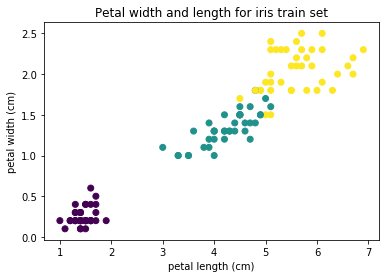

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                                bootstrap = True,
                                max_samples = None, # int, float
                                oob_score = True,
                                criterion = "gini",
                                #splitter = "best", not available here, performs best
                                max_depth = 1,#decision stumps
                                min_samples_split = 2, 
                                min_samples_leaf = 1,
                                min_weight_fraction_leaf = 0,
                                max_features = None,
                                max_leaf_nodes = None,
                                random_state = None,
                                min_impurity_decrease = 0.0,
                                class_weight = None,
                                ccp_alpha = 0.0,
                                n_jobs = -1
                               )
rf_clf.fit(X_train, y_train)
print("Test score:",rf_clf.score(X_test,y_test))
print("OOB score:",rf_clf.oob_score_)

Test score: 0.9333333333333333
OOB score: 0.9416666666666667


In [5]:
rf_clf.feature_importances_

array([0.47, 0.53])

In [6]:
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title)
    

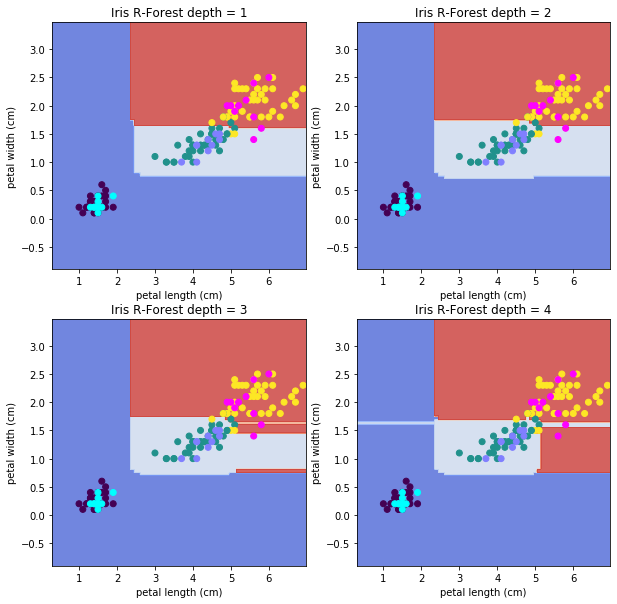

In [7]:
fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    rf_clf = RandomForestClassifier(max_depth = max_depth, random_state = 1)
    rf_clf.fit(X_train, y_train)
    plotDecisionBoundary(rf_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris R-Forest depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()

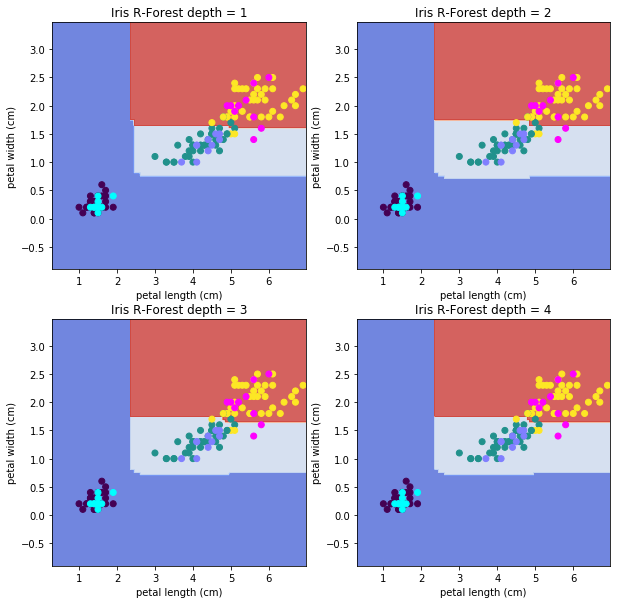

In [9]:
fig = plt.figure(figsize=(10,10))
max_depth = 1
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    rf_clf = RandomForestClassifier(max_depth = max_depth, random_state = 1, ccp_alpha=.05)
    rf_clf.fit(X_train, y_train)
    plotDecisionBoundary(rf_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris R-Forest depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()